In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [18]:
df=pd.read_csv("SOCR-HeightWeight.csv")

In [19]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [20]:
df=df.drop('Index',inplace=True)

KeyError: "['Index'] not found in axis"

In [21]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [22]:
df=df.rename(columns={'Height(Inches)':'Height','Weight(Pounds)':'Weights'})

In [25]:
df['Height']=df['Height'].astype(int)
df['Weights']=df['Weights'].astype(int)
df=df.drop('Weight',axis=1)
print(df)

KeyError: "['Weight'] not found in axis"

In [26]:
df['Height'].isnull().sum()

0

In [27]:
df['Weights'].isnull().sum()

0

In [28]:
df['Height'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 25000 entries, 0 to 24999
Series name: Height
Non-Null Count  Dtype
--------------  -----
25000 non-null  int32
dtypes: int32(1)
memory usage: 97.8 KB


In [29]:
df = df.drop(df.index[30:])

In [30]:
df.head()

,Index,Height,Weights
0,1,65,112
1,2,71,136
2,3,69,153
3,4,68,142
4,5,67,144


Text(0, 0.5, 'Height')

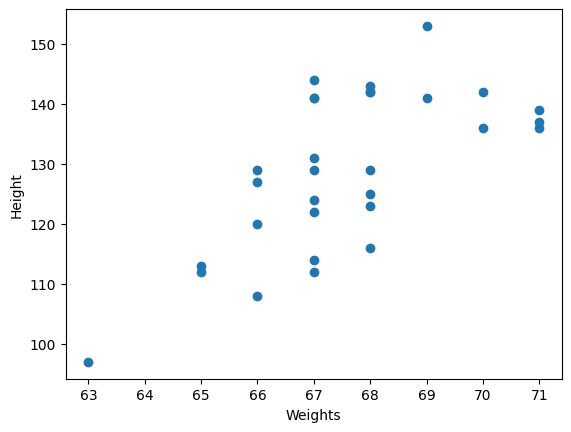

In [31]:
plt.scatter(df['Height'],df['Weights'])
plt.xlabel('Weights')
plt.ylabel('Height')

In [32]:
X=df[['Weights']]
y=df['Height']

In [33]:
y

0     65
1     71
2     69
3     68
4     67
5     68
6     69
7     70
8     67
9     66
10    66
11    67
12    68
13    67
14    68
15    71
16    66
17    68
18    71
19    67
20    67
21    68
22    63
23    68
24    67
25    67
26    70
27    67
28    66
29    65
Name: Height, dtype: int32

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [36]:
X.shape

(30, 1)

In [37]:
y.shape

(30,)

In [38]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((24, 1), (6, 1), (24,), (6,))

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler=StandardScaler()


In [41]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


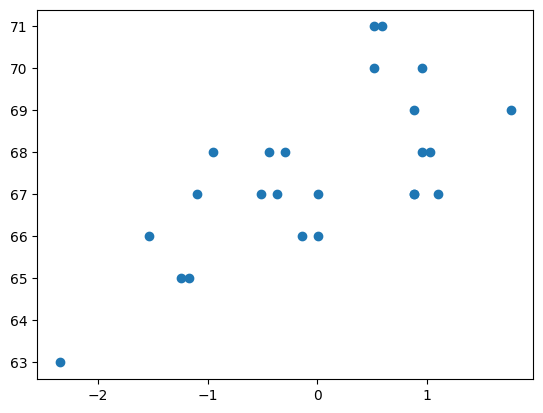

In [42]:
plt.scatter(X_train,y_train)

In [43]:
#Train the simple linear regression model

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
regressor=LinearRegression()

In [46]:
regressor.fit(X_train,y_train)

LinearRegression()

In [47]:
print("The Slope or coefficent of weight is",regressor.coef_)
print("Intercept:",regressor.intercept_)

The Slope or coefficent of weight is [1.26345121]
Intercept: 67.5


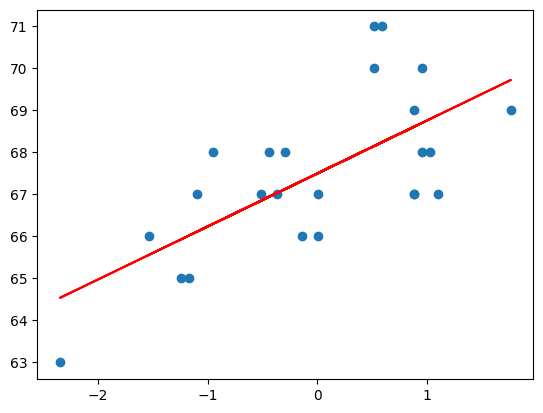

In [48]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

In [67]:
y_pred_test=regressor.predict(X_test)

In [69]:
y_pred_test,y_test

(array([67.68916358, 68.43037597, 67.50386048, 68.70833061, 65.92878416,
        66.66999655]),
 27    67
 15    71
 23    68
 17    68
 8     67
 9     66
 Name: Height, dtype: int32)

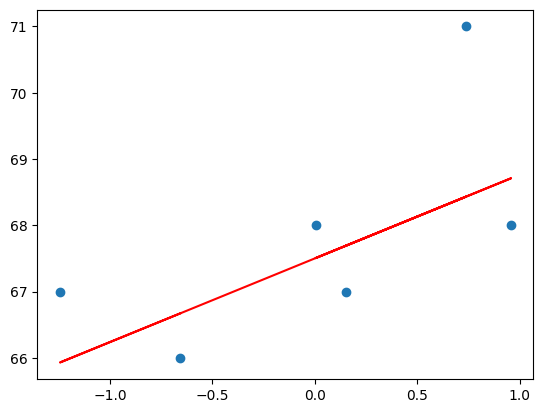

In [70]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

In [71]:
#Performance metrix 
#MSE,MAE,RMSE


In [72]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [74]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


1.5703665906209852
1.0340783548530652
1.2531426856591332


In [77]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)

In [78]:
score

0.3647955363780282

In [79]:
#Display the adjusted R-Squared

In [80]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.20599442047253524

In [81]:
#R square value is always be greater than adjusted R square


In [82]:
regressor

LinearRegression()

In [83]:
scaled_weight=scaler.transform([[80]])
scaled_weight

C:\Users\sharath R\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-3.59021808]])

In [85]:
print("The height prediction for weight 80 kg is:",regressor.predict(scaled_weight[[0]]))

The height prediction for weight 80 kg is: [62.96393461]


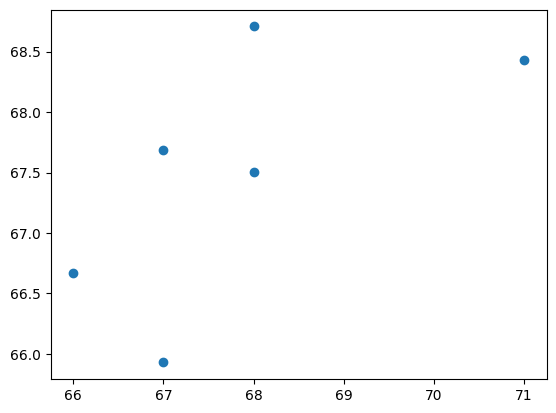

In [86]:
plt.scatter(y_test,y_pred_test)

In [87]:
residuals=y_test-y_pred_test
residuals

27   -0.689164
15    2.569624
23    0.496140
17   -0.708331
8     1.071216
9    -0.669997
Name: Height, dtype: float64

C:\Users\sharath R\AppData\Local\Temp\ipykernel_9144\3905197135.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

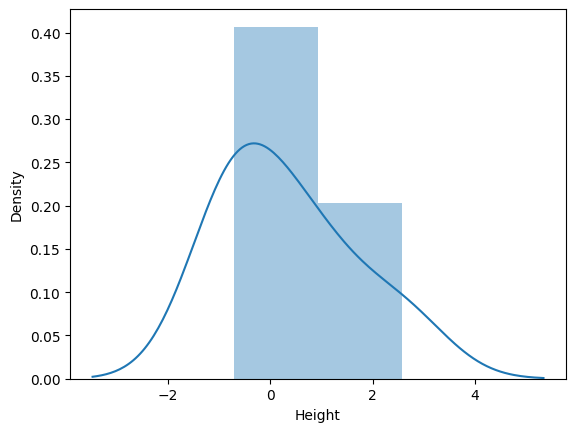

In [90]:
import seaborn as sns
sns.distplot(residuals,kde=True)

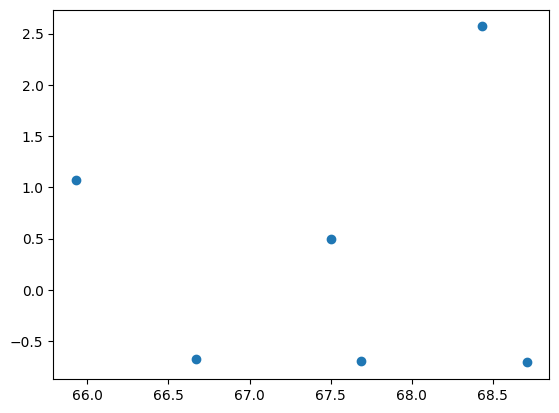

In [91]:
plt.scatter(y_pred_test,residuals)